In [7]:
# Import All Dependencies
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

### Data Import / Cleaning

In [8]:
# load the data
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [11]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


#### Converting JSON to string

In [13]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

# changing the cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

# changing the crew column from json to string    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [14]:
# after modify
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Merging Two CSV

In [15]:
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')
movies = movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [16]:
movies.iloc[25]

id                                                              597
original_title                                              Titanic
genres                             ['Drama', 'Romance', 'Thriller']
cast              ['Kate Winslet', 'Leonardo DiCaprio', 'Frances...
vote_average                                                    7.5
director                                              James Cameron
keywords          ['shipwreck', 'iceberg', 'ship', 'panic', 'tit...
Name: 25, dtype: object

In [17]:
movies.shape

(4803, 7)

In [18]:
movies.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

In [19]:
# get to know the type for each column 
movies.dtypes

id                  int64
original_title     object
genres             object
cast               object
vote_average      float64
director           object
keywords           object
dtype: object

### Work with Genre

In [20]:
# remove all squarebrackets, remove spaces in string, remove single quotes, and remove double quotesb
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

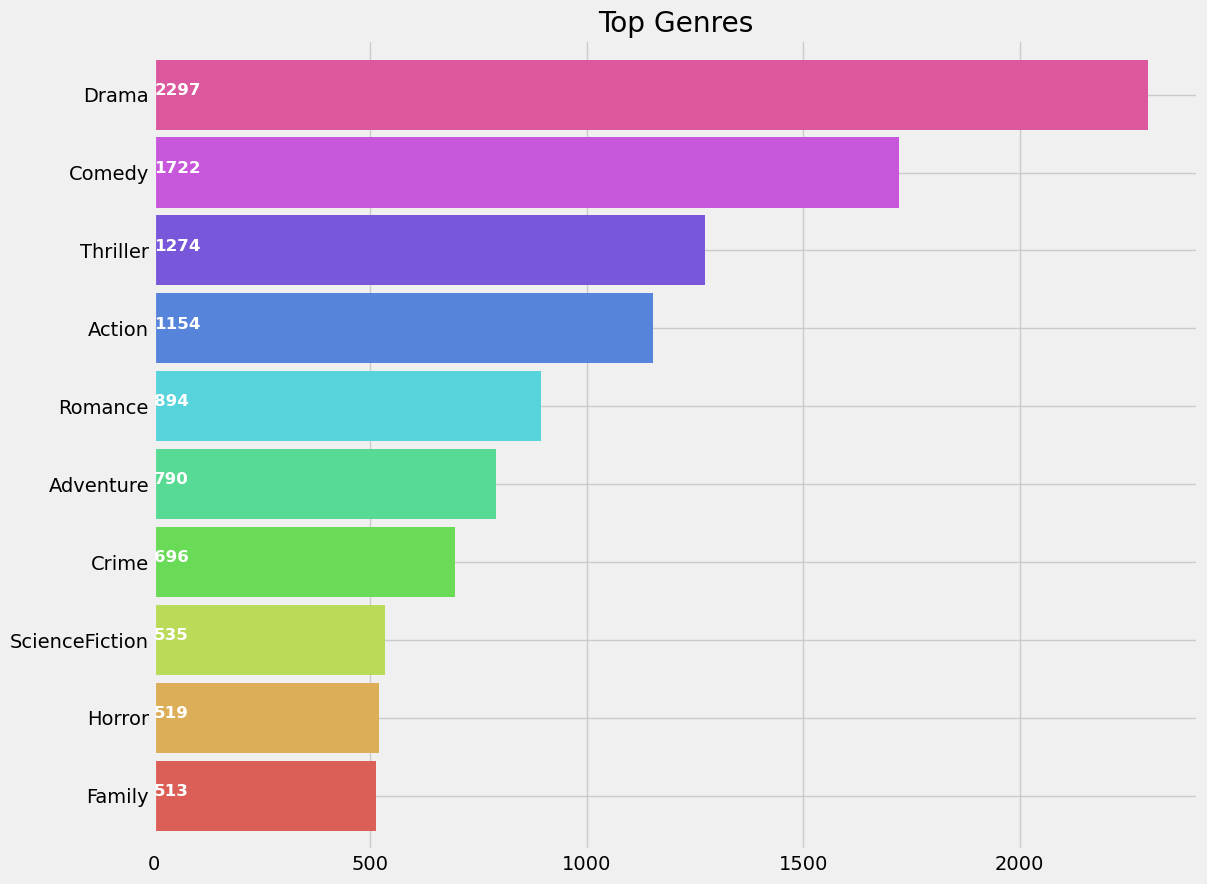

In [21]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [22]:
# Observation: 
#  - Drame is the most popular genre
#  - Followed by Comedy and Thriller

In [23]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [24]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [25]:
# One hot encoding with multiple labels
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [26]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

### Work with cast

In [27]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

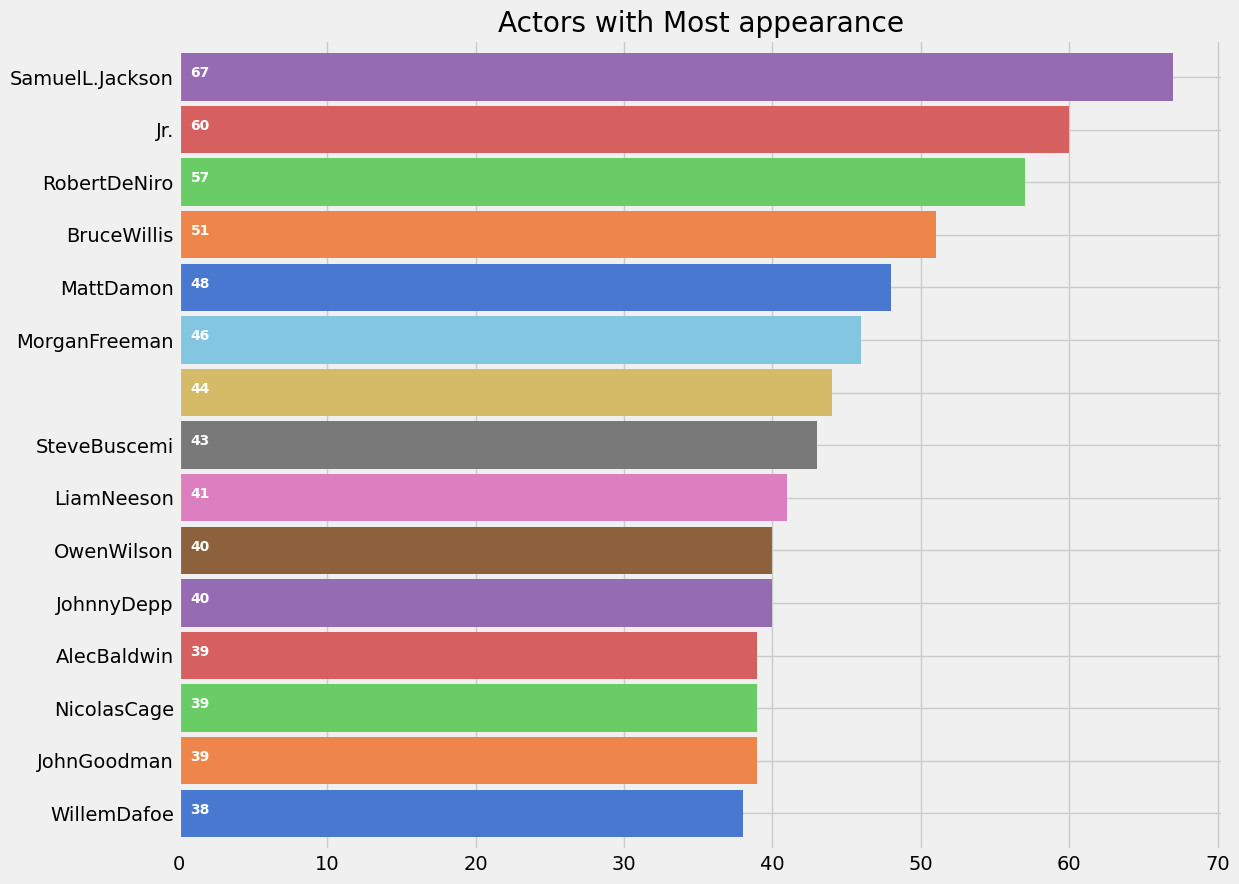

In [28]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with Most appearance')
plt.show()

In [29]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)

movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [30]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]

    for i in cast:
        if i not in castList:
            castList.append(i)

castList[:8]


['S', 'a', 'm', 'W', 'o', 'r', 't', 'h']

In [31]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [32]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
2    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
Name: cast_bin, dtype: object

### Work with director

In [33]:
def director(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(director)

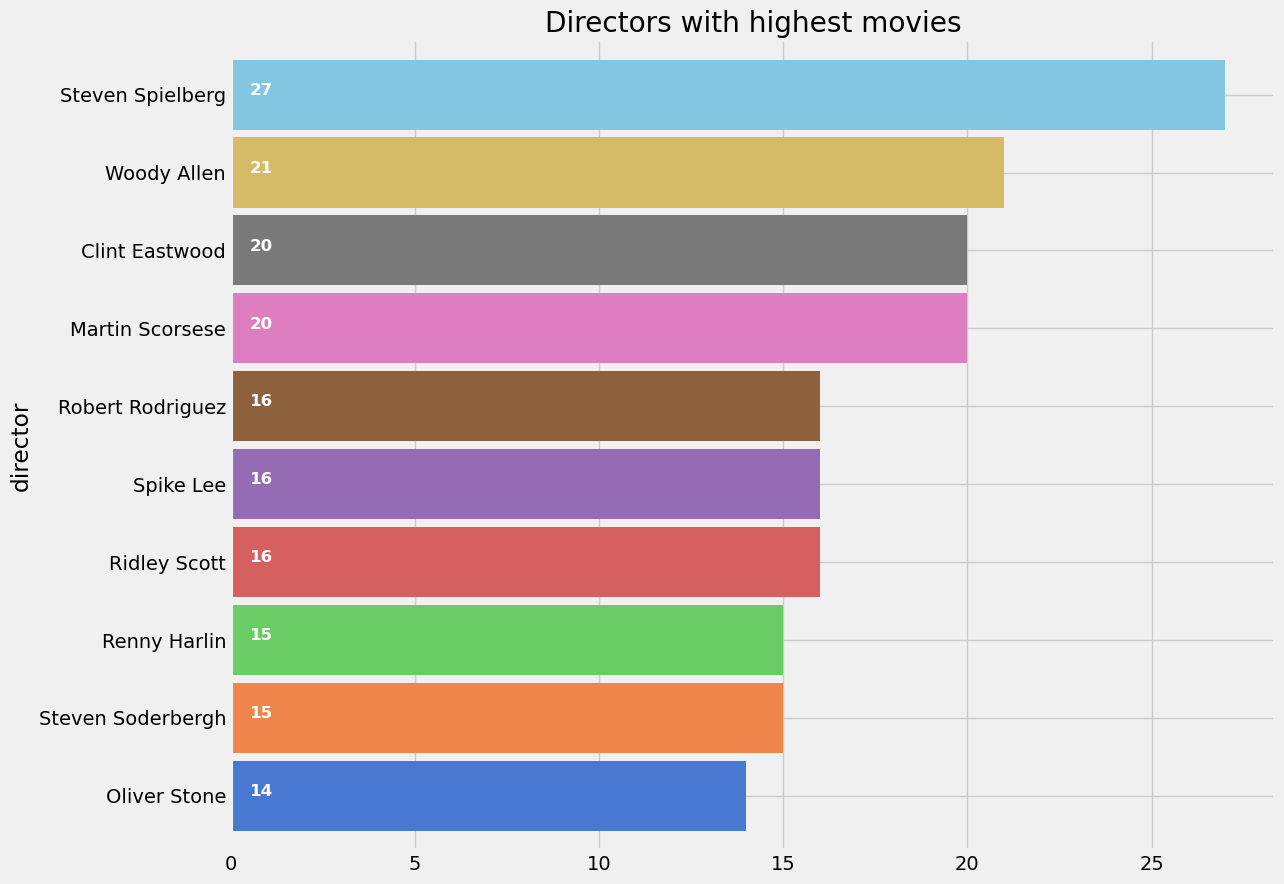

In [34]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [35]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [36]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [37]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","SamWorthington,SigourneyWeaver,StephenLang,Zoe...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]","JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","AnneHathaway,ChristianBale,GaryOldman,MichaelC...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Work with keyword column

In [38]:
# Note wordcloud need additional install in Anaconda's case its the code im using

In [39]:
# conda install -c conda-forge wordcloud

In [40]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [43]:
#nltk.download()
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/meatywind/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

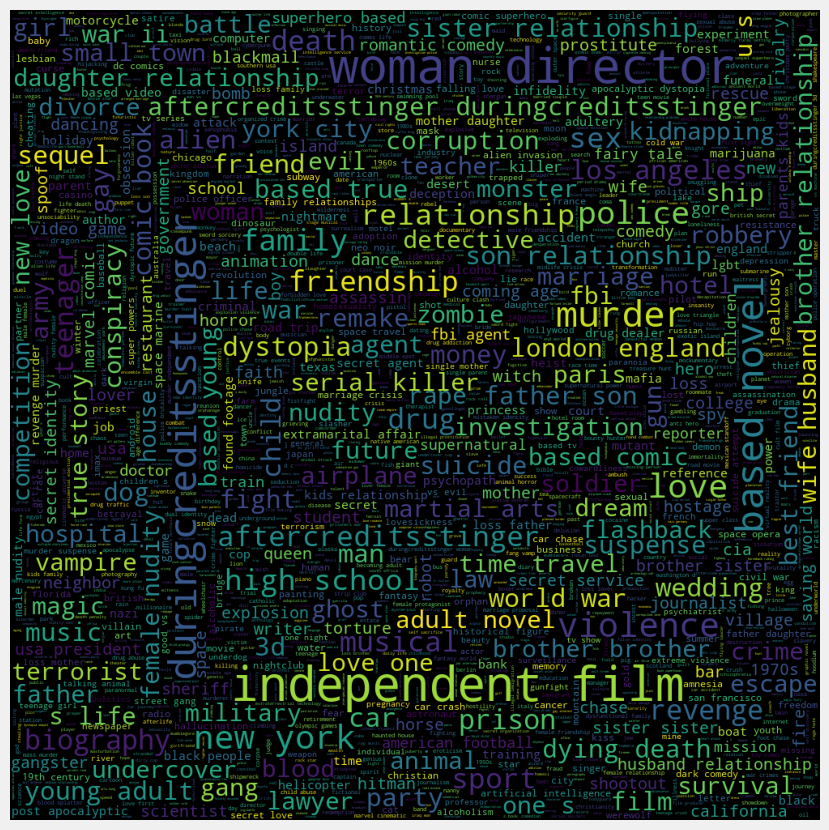

In [44]:
# Create wordcloud showing the major keywords or tags used for describing the movies
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [45]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [46]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [47]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [48]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']

## Similarity between movies

In [49]:
# using cosine similarity

from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [58]:
Similarity(5,192) #checking similarity between any 2 random movies

2.2910509922059457

In [59]:
# the closer the distance, the more those two movies are related to each other
# for example, take action movie spider man 3 vs Australia in Drama
# it is obviously not gonna work well
print(movies.iloc[5])
print(movies.iloc[192])
# as it supports the conclusion those two moview are NOT related

id                                                              559
original_title                                         Spider-Man 3
genres                                 [Action, Adventure, Fantasy]
cast              JamesFranco,KirstenDunst,ThomasHadenChurch,Tob...
vote_average                                                    5.9
director                                                  Sam Raimi
keywords          [amnesia, deathofafriend, dualidentity, egoman...
genres_bin        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
director_bin      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 5, dtype: object
id                                                             6972
original_title                                            Australia
genres                                                      [Drama]
cast                David

In [60]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Score Predictor

In [61]:
# predict score based off of neighbor films

import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [63]:
# NOTE: you HAVE TO spell the name right for this to WORK
predict_score('Australia')

Selected Movie:  Australia

Recommended Movies: 

Romeo + Juliet | Genres: 'Drama','Romance' | Rating: 6.7
The Great Gatsby | Genres: 'Drama','Romance' | Rating: 7.3
Moulin Rouge! | Genres: 'Drama','Music','Romance' | Rating: 7.4
Straight Out of Brooklyn | Genres: 'Drama' | Rating: 4.3
Animals | Genres: 'Drama' | Rating: 6.2
A Few Good Men | Genres: 'Drama' | Rating: 7.1
Rabbit Hole | Genres: 'Drama' | Rating: 6.9
For Colored Girls | Genres: 'Drama' | Rating: 7.0
Philomena | Genres: 'Drama' | Rating: 7.4
My Week with Marilyn | Genres: 'Drama' | Rating: 6.6


The predicted rating for Australia is: 6.690000
The actual rating for Australia is 6.300000


In [64]:
predict_score("Man of Steel")

Selected Movie:  Man of Steel

Recommended Movies: 

Batman v Superman: Dawn of Justice | Genres: 'Action','Adventure','Fantasy' | Rating: 5.7
300 | Genres: 'Action','Adventure','War' | Rating: 7.0
Sucker Punch | Genres: 'Action','Fantasy','Thriller' | Rating: 5.9
Legend of the Guardians: The Owls of Ga'Hoole | Genres: 'Adventure','Animation','Family','Fantasy' | Rating: 6.5
Dawn of the Dead | Genres: 'Action','Fantasy','Horror' | Rating: 6.8
Watchmen | Genres: 'Action','Mystery','ScienceFiction' | Rating: 7.0
Superman | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 6.9
Superman Returns | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 5.4
Superman II | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 6.5
X-Men: Days of Future Past | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 7.5


The predicted rating for Man of Steel is: 6.520000
The actual rating for Man of Steel is 6.500000


In [65]:
predict_score("The Avenger")

Selected Movie:  The Avengers

Recommended Movies: 

Avengers: Age of Ultron | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.3
Serenity | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 7.4
Captain America: Civil War | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.1
Captain America: The Winter Soldier | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.6
Pacific Rim | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.7
Independence Day: Resurgence | Genres: 'Action','Adventure','ScienceFiction' | Rating: 4.9
Captain America: The First Avenger | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.6
Iron Man | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Megaforce | Genres: 'Action','Adventure','ScienceFiction' | Rating: 3.5
Iron Man 3 | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.8


The predicted rating for The Avengers is: 6.530000
The actual rating for The Avengers is 7.400000


In [66]:
predict_score("The Amazing Spider-Man")

Selected Movie:  The Amazing Spider-Man

Recommended Movies: 

The Amazing Spider-Man 2 | Genres: 'Action','Adventure','Fantasy' | Rating: 6.5
Clash of the Titans | Genres: 'Action','Adventure','Fantasy' | Rating: 5.6
Pirates of the Caribbean: The Curse of the Black Pearl | Genres: 'Action','Adventure','Fantasy' | Rating: 7.5
The Hobbit: An Unexpected Journey | Genres: 'Action','Adventure','Fantasy' | Rating: 7.0
Conan the Destroyer | Genres: 'Action','Adventure','Fantasy' | Rating: 5.8
The Hobbit: The Battle of the Five Armies | Genres: 'Action','Adventure','Fantasy' | Rating: 7.1
The Last Witch Hunter | Genres: 'Action','Adventure','Fantasy' | Rating: 5.7
Highlander | Genres: 'Action','Adventure','Fantasy' | Rating: 6.8
Batman v Superman: Dawn of Justice | Genres: 'Action','Adventure','Fantasy' | Rating: 5.7
The 13th Warrior | Genres: 'Action','Adventure','Fantasy' | Rating: 6.4


The predicted rating for The Amazing Spider-Man is: 6.410000
The actual rating for The Amazing Spider-Ma